## Clustering 📦📦📦

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
#scikit is an open source data analysis library, and the gold standard for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Read the data

In [3]:
df = pd.read_csv('penguins_cluster.csv')
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
301,Gentoo,47.2,13.7,214.0,4925.0
302,Gentoo,46.8,14.3,215.0,4850.0
303,Gentoo,50.4,15.7,222.0,5750.0
304,Gentoo,45.2,14.8,212.0,5200.0


#### 2. Show the first 10 rows of the data

In [4]:
df.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
5,Adelie,38.9,17.8,181.0,3625.0
6,Adelie,39.2,19.6,195.0,4675.0
7,Adelie,41.1,17.6,182.0,3200.0
8,Adelie,38.6,21.2,191.0,3800.0
9,Adelie,34.6,21.1,198.0,4400.0


In [5]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

#### 3. We are going work with the numerical data. Filter out the species column, name the dataset df_num and show the dataset.

In [7]:
df_num = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
301,47.2,13.7,214.0,4925.0
302,46.8,14.3,215.0,4850.0
303,50.4,15.7,222.0,5750.0
304,45.2,14.8,212.0,5200.0


#### 4. Use the `describe()` function to see if the variables in the data set have large differences between their ranges.

In [9]:
df_num.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,306.000000,306.000000,306.000000,306.000000
mean,44.104575,17.012745,201.444444,4217.810458
std,5.677102,1.942248,14.397354,827.289041
min,32.100000,13.100000,172.000000,2700.000000
25%,39.000000,15.300000,190.000000,3550.000000
50%,45.200000,17.200000,198.000000,3950.000000
75%,49.000000,18.600000,214.000000,4850.000000
max,59.600000,21.200000,231.000000,6300.000000


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

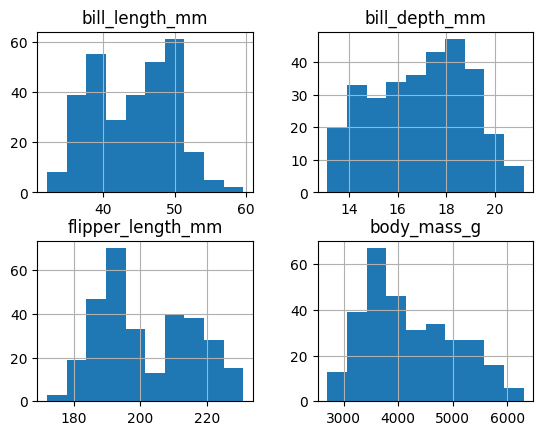

In [10]:
df_num.hist()

#### 5. Do you see any large difference? If yes which features? 


#### 6. If you think one or more features may dominate over the other ones, you need to standardize the data. Name the scaled data as penguins_scaled.

**Feature Scaling is an important technique that mostly comes to the picture during pre-processing step in Machine Learning.**
 
We use feature scaling when the variables in the data set have large differences in order of magnitude, or when they are similar in that sense but measured with different metrics such as meters vs kilometers, etc. 
These differences cause problems for many models. For example, if one of the features has a way higher order of magnitude, this particular feature will dominate over the other ones.

In order to avoid this issue, we will perform feature scaling which brings all of the measurements into a similar range of values. There are different approaches to feature scaling:
- normalization - it maps the data in the range between 0 and 1 (the minimal data point will be mapped to 0 and the maximal one to 1). Note that if the data consist of any outliers it will influence the new distribution heavily.
- standarization - it maps the data in a way that all the new values will oscilate around 0 with a unit standard deviation. In this case, the mapped values are not restricted to a particular range. Standarization is widely used when the data has a gaussian distribution.

Imagine you have a 2 dimensional dataset representing the body measurements of a group of adult people: height in meters and weight in kg. The height ranges respectively from 1 to 2 and weight from 40 to 200. It does not matter which model you use on this dataset, the weight feature will dominate over the height and it will contribute more to the computation.  

In python we can use scikit-learn to scale the data.

In [11]:
scaler = StandardScaler()
scaler.fit(df_num)
df_num_scaled = scaler.transform(df_num)
df_num_scaled

array([[-0.88298091,  0.87013517, -1.42234005, -0.56640027],
       [-0.81240701,  0.19971144, -1.07448514, -0.5058629 ],
       [-0.67125922,  0.50913778, -0.44834632, -1.17177393],
       ...,
       [ 1.11073163, -0.67699651,  1.43007016,  1.85509441],
       [ 0.19327099, -1.14113601,  0.73436035,  1.18918337],
       [ 1.02251426, -0.47071228,  0.80393133,  1.43133284]])

#### 7. The standardized data is an array. Please convert the array to a pandas dataframe, Name the data df_penguins. (Hint: columns = df_num.columns) 

In [14]:
df_penguins = pd.DataFrame(df_num_scaled, columns=df_num.columns)
df_penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.882981,0.870135,-1.422340,-0.566400
1,-0.812407,0.199711,-1.074485,-0.505863
2,-0.671259,0.509138,-0.448346,-1.171774
3,-1.306424,1.179561,-0.587488,-0.929624
4,-0.847694,1.849985,-0.796201,-0.687475


#### 8. Check how does the scaled data look like.

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

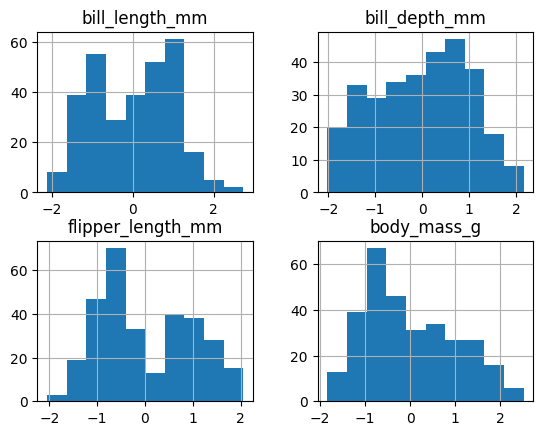

In [13]:
df_penguins.hist()

#### 9. Let's imagine that we don't know anything about the data and we assume there might be only two groups of penguins.

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_penguins)

Exception in thread Thread-44 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\yuqin\miniconda3\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\yuqin\miniconda3\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\yuqin\miniconda3\Lib\threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\yuqin\miniconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa8 in position 3: invalid start byte
c:\Users\yuqin\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_M

KMeans(n_clusters=2, random_state=42)

In [19]:
kmeans.inertia_

487.40130957014276

#### 10. Let's check which labels we have

In [16]:
# assign a cluster to each example
clusters = kmeans.predict(df_penguins)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:

# retrieve unique clusters
labels = np.unique(clusters)
labels

array([0, 1], dtype=int32)

In [21]:
pd.Series(clusters).value_counts().sort_index()

0    187
1    119
Name: count, dtype: int64

#### 11. Now we are adding the defined clusters to the dataframe

In [22]:
df_clustered = df_penguins.copy()
df_clustered['cluster'] = clusters
df_clustered

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.882981,0.870135,-1.422340,-0.566400,0
1,-0.812407,0.199711,-1.074485,-0.505863,0
2,-0.671259,0.509138,-0.448346,-1.171774,0
3,-1.306424,1.179561,-0.587488,-0.929624,0
4,-0.847694,1.849985,-0.796201,-0.687475,0
...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1
302,0.475567,-1.398991,0.943073,0.765422,1
303,1.110732,-0.676997,1.430070,1.855094,1
304,0.193271,-1.141136,0.734360,1.189183,1


In [23]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     306 non-null    float64
 1   bill_depth_mm      306 non-null    float64
 2   flipper_length_mm  306 non-null    float64
 3   body_mass_g        306 non-null    float64
 4   cluster            306 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 10.9 KB


#### 12. Add real penguins species to the dataframe again 

In [24]:
df_clustered['species'] = df['species']
df_clustered

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species
0,-0.882981,0.870135,-1.422340,-0.566400,0,Adelie
1,-0.812407,0.199711,-1.074485,-0.505863,0,Adelie
2,-0.671259,0.509138,-0.448346,-1.171774,0,Adelie
3,-1.306424,1.179561,-0.587488,-0.929624,0,Adelie
4,-0.847694,1.849985,-0.796201,-0.687475,0,Adelie
...,...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1,Gentoo
302,0.475567,-1.398991,0.943073,0.765422,1,Gentoo
303,1.110732,-0.676997,1.430070,1.855094,1,Gentoo
304,0.193271,-1.141136,0.734360,1.189183,1,Gentoo


#### 13. Let's check the mapping between the species and clusters

In [25]:
adelie = df_clustered.loc[df_clustered['species'] == 'Adelie']

In [26]:
adelie['cluster'].unique()

array([0], dtype=int32)

In [27]:
gentoo = df_clustered.loc[df_clustered['species'] == 'Gentoo']
gentoo['cluster'].unique()

array([1], dtype=int32)

In [28]:
chinstrap = df_clustered.loc[df_clustered['species'] == 'Chinstrap']
chinstrap['cluster'].unique()

array([0], dtype=int32)

#### 14. Let's use elbow method to see how many clusters are recommended for this dataset (we know that there are 3 species in the dataset)

**The Elbow Method**

The elbow method is one of the most well-known methods in machine learning and could be also used for finding the optimal number of clusters. With calculating the **Within-Cluster-Sum of Squared Errors ([WSS](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb))** for different values of k we can choose the k for which WSS first starts to decrease. In a plot this will show an elbow joint.


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

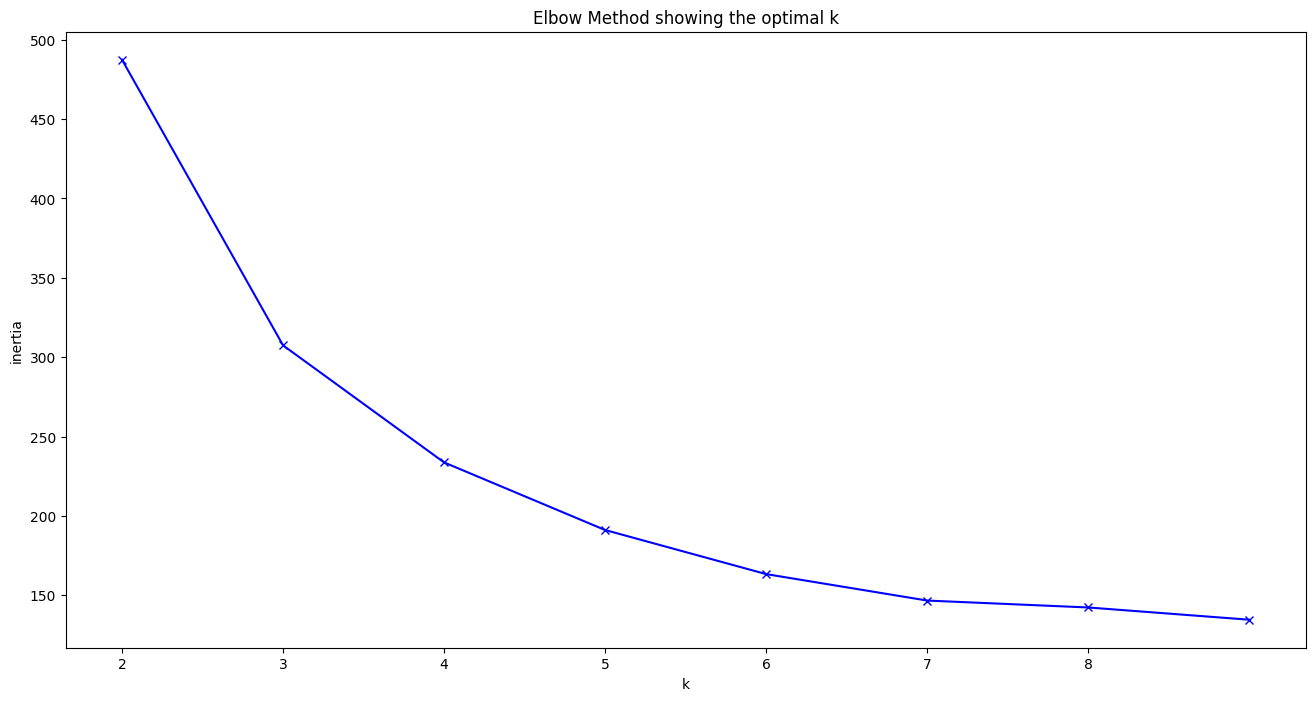

In [29]:
K = range(2, 10) #let's give it a range
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_penguins)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # shows the x symbols on the graph
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K), 1.0))
plt.title('Elbow Method showing the optimal k')

We can see a light elbow for k = 3 which fits our knowledge of the dataset.

#### 15. Repeat k-means clustering with k = 3

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_penguins)

clusters = kmeans.predict(df_penguins)
df_clustered_3 = df_penguins.copy() 
df_clustered_3["cluster"] = clusters
df_clustered_3

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.882981,0.870135,-1.422340,-0.566400,2
1,-0.812407,0.199711,-1.074485,-0.505863,2
2,-0.671259,0.509138,-0.448346,-1.171774,2
3,-1.306424,1.179561,-0.587488,-0.929624,2
4,-0.847694,1.849985,-0.796201,-0.687475,2
...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1
302,0.475567,-1.398991,0.943073,0.765422,1
303,1.110732,-0.676997,1.430070,1.855094,1
304,0.193271,-1.141136,0.734360,1.189183,1


In [31]:
df_clustered_3['species'] = df[['species']]
df_clustered_3

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster,species
0,-0.882981,0.870135,-1.422340,-0.566400,2,Adelie
1,-0.812407,0.199711,-1.074485,-0.505863,2,Adelie
2,-0.671259,0.509138,-0.448346,-1.171774,2,Adelie
3,-1.306424,1.179561,-0.587488,-0.929624,2,Adelie
4,-0.847694,1.849985,-0.796201,-0.687475,2,Adelie
...,...,...,...,...,...,...
301,0.546140,-1.708418,0.873502,0.856228,1,Gentoo
302,0.475567,-1.398991,0.943073,0.765422,1,Gentoo
303,1.110732,-0.676997,1.430070,1.855094,1,Gentoo
304,0.193271,-1.141136,0.734360,1.189183,1,Gentoo


In [33]:
adelie_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Adelie']
adelie_3['cluster'].unique() # which label got Adelie?

array([2], dtype=int32)

In [35]:
gentoo_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Gentoo']
gentoo_3['cluster'].unique() # which label got Adelie?

array([1], dtype=int32)

In [34]:
chinstrap_3 = df_clustered_3.loc[df_clustered_3['species'] == 'Chinstrap']
chinstrap_3['cluster'].unique() # which label got Adelie?

array([0], dtype=int32)